In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import ntpath

from sklearn.utils import shuffle
import random

## Lectura del fichero CSV
Vamos a suponer que no se ha cambiado el nombre del fichero csv generado en el simulador, y que se encuentra en la misma carpeta que este Notebook.

In [2]:
def lee_csv():
    #Lectura en crudo del fichero CSV generado, añadiendo los labels a cada columna
    columnas = ['centro', 'izquierda', 'derecha', 'angulo', 'acelerador', 'freno', 'velocidad']
    datos = pd.read_csv('driving_log.csv', names = columnas)

    return datos

## Renombre de la ruta de las imágenes
Se elimina la ruta absoluta de las imágenes, de esta forma el dataset puede ser usado en diferentes máquinas y/o en diferentes carpetas.

In [3]:
def renombra_imagenes(datos):
    #Modificación de las 3 primeras columnas, correspondiente a la ruta de las imágenes
    datos['centro'] = datos['centro'].apply(get_tail)
    datos['izquierda'] = datos['izquierda'].apply(get_tail)
    datos['derecha'] = datos['derecha'].apply(get_tail)
    
    return datos

#Función para obtener la 'hoja' del árbol perteneciente a la ruta absoluta de la imagen, que corresponde con su nombre
def get_tail(path):
    head, tail = ntpath.split(path) #Separando por "/", tail es el último elemento, y head todo lo anterior
    
    return tail

## Funciones de generación y dibujado del histograma

In [4]:
def genera_histograma(datos, num_bins):
    #Generación del histograma (sus variables serán usadas en la celda siguiente para procesar los elementos sobrantes)
    hist, bins = np.histogram(datos['angulo'], num_bins)
    return hist, bins

def dibuja_histograma(datos, num_bins, max_muestras_por_bin=0):
    #Dibujado del histograma
    plt.hist(datos['angulo'], num_bins)

    plt.xlabel('Ángulo')
    plt.ylabel('Frecuencia')
    plt.title("Distribución de los ángulos") 

    if max_muestras_por_bin != 0:
        #Línea representando max_muestras_por_bin sobre el histograma
        plt.plot((np.min(datos['angulo']), np.max(datos['angulo'])), (max_muestras_por_bin, max_muestras_por_bin))

    plt.show()

## Balanceo del dataset

In [5]:
#-------------BALANCEO DEL DATASET------------------------
def balancea_dataset(datos, num_bins, bins, max_muestras_por_bin):
    datos_preprocesados = datos.copy() #Copia del dataset original
    elementos_a_eliminar = []

    #Recorrido de cada bin
    for i in range(num_bins):
      lista = []
    #Recorrido de cada elemento del dataset: si el ángulo pertenece al bin que estamos recorriendo, lo 
    #metemos en la lista
      for j in range(len(datos['angulo'])):
        if datos['angulo'][j] >= bins[i] and datos['angulo'][j] <= bins[i+1]:
          lista.append(j)

    #Mezclamos los elementos que pertenecen al bin
      lista = shuffle(lista)
      #Nos quedamos con las "sobras" basado en el umbral que hayamos decidido (max_muestras_por_bin), para posteriormente
      #añadirlo a elementos_a_eliminar y utilizarla como lista con los elementos a eliminar en el dataset
      lista = lista[max_muestras_por_bin:]
      elementos_a_eliminar.extend(lista)

    #Eliminamos dichos datos del dataset
    datos_preprocesados.drop(datos_preprocesados.index[elementos_a_eliminar], inplace=True)
    
    return datos_preprocesados

## Función de recortado de imagen

In [6]:
#Función de recortado de un fotograma
def recorte(img):
    img = img[70:135,:,:]
    return img

***
# Pruebas
Para llevar a cabo las pruebas, hay que ejecutar antes todas las celdas superiores.

## Prueba 1: Lectura del fichero

In [7]:
def prueba1():
    print("Lectura del fichero CSV.\n")
    print("Debe estar en la misma carpeta que este notebook, con el mismo nombre y acompañado de la carpeta IMG\n")
    try:
        datos = lee_csv()
    except:
        print("Error al leer el fichero csv.")
        raise
    print("El fichero se ha leído correctamente. Los 5 primeros elementos son:")
    print(datos.head())

In [8]:
prueba1()

Lectura del fichero CSV.

Debe estar en la misma carpeta que este notebook, con el mismo nombre y acompañado de la carpeta IMG

El fichero se ha leído correctamente. Los 5 primeros elementos son:
                                              centro  \
0  C:\Users\webde\Desktop\3v2d\IMG\center_2019_08...   
1  C:\Users\webde\Desktop\3v2d\IMG\center_2019_08...   
2  C:\Users\webde\Desktop\3v2d\IMG\center_2019_08...   
3  C:\Users\webde\Desktop\3v2d\IMG\center_2019_08...   
4  C:\Users\webde\Desktop\3v2d\IMG\center_2019_08...   

                                           izquierda  \
0  C:\Users\webde\Desktop\3v2d\IMG\left_2019_08_1...   
1  C:\Users\webde\Desktop\3v2d\IMG\left_2019_08_1...   
2  C:\Users\webde\Desktop\3v2d\IMG\left_2019_08_1...   
3  C:\Users\webde\Desktop\3v2d\IMG\left_2019_08_1...   
4  C:\Users\webde\Desktop\3v2d\IMG\left_2019_08_1...   

                                             derecha    angulo  acelerador  \
0  C:\Users\webde\Desktop\3v2d\IMG\right_2019_08_...

## Prueba 2: Preprocesado del dataset

In [9]:
#Definición de las características del histograma
num_bins = 23
max_muestras_por_bin = 300

In [10]:
def prueba2():
    print("--Prueba 2: Preprocesado del dataset--\n")
    
    try:
        print("Lectura del fichero...\n")
        datos = lee_csv()
    except:
        print("Error al leer el fichero csv.")
        raise
    print("El fichero se ha leído correctamente.")
    
    primero = datos.iloc[0]
    print("Ruta de la imagen del primer elemento del dataset: ")
    print(primero[0])
    
    try:
        print("\nConversión de las rutas absolutas de las imágenes en relativas...\n")
        datos_renombrados = renombra_imagenes(datos)
    except:
        print("Error al renombrar el nombre de las imágenes.")
        raise
    print("Conversión realizada correctamente.\n")
    
    primero = datos_renombrados.iloc[0]
    print("Ruta de la imagen del primer elemento del dataset: ")
    print(primero[0])
    
    try:
        print("\nGeneración de histograma...\n")
        hist, bins = genera_histograma(datos_renombrados, num_bins)
    except:
        print("Error al generar el histograma.")
        raise
    print("Histograma generado correctamente.\n")
    
    try:
        print("\nBalanceo del dataset...\n")
        datos_procesados = balancea_dataset(datos_renombrados, num_bins, bins, max_muestras_por_bin)
    except:
        print("Error al balancear el dataset.")
        raise
    print("Dataset balanceado correctamente.\n")
    
    print("Histograma del dataset sin procesar:")
    dibuja_histograma(datos, num_bins, max_muestras_por_bin)
    
    print("Histograma del dataset procesado:")
    dibuja_histograma(datos_procesados, num_bins, max_muestras_por_bin)

--Prueba 2: Preprocesado del dataset--

Lectura del fichero...

El fichero se ha leído correctamente.
Ruta de la imagen del primer elemento del dataset: 
C:\Users\webde\Desktop\3v2d\IMG\center_2019_08_10_22_24_32_972.jpg

Conversión de las rutas absolutas de las imágenes en relativas...

Conversión realizada correctamente.

Ruta de la imagen del primer elemento del dataset: 
center_2019_08_10_22_24_32_972.jpg

Generación de histograma...

Histograma generado correctamente.


Balanceo del dataset...

Dataset balanceado correctamente.

Histograma del dataset sin procesar:


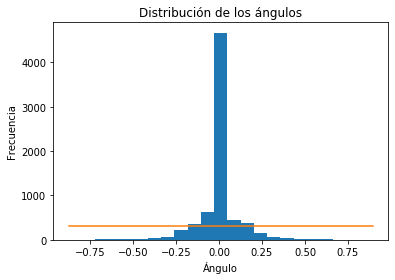

Histograma del dataset procesado:


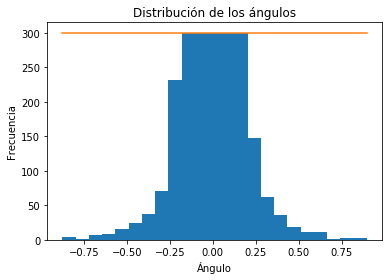

In [11]:
prueba2()

## Prueba 3: Recorte de imagen

In [12]:
def prueba3():
    print("--Prueba 3: Recorte de imagen--\n")
    
    try:
        print("Lectura y preprocesado del dataset...\n")
        datos = lee_csv()
        datos_renombrados = renombra_imagenes(datos)
        hist, bins = genera_histograma(datos_renombrados, num_bins)
        datos_procesados = balancea_dataset(datos_renombrados, num_bins, bins, max_muestras_por_bin)
    except:
        print("Error haciendo el procedimiento inicial.")
        raise
    print("Dataset leído y procesado correctamente.\n")
    
    try:
        print("Selección de una imagen al azar del conjunto de datos...\n")
        num_random = random.randrange(0, len(datos_procesados))
        elemento_random = datos_procesados.iloc[num_random]
        img = elemento_random[0]
        img = os.path.join('IMG/', img) #Hay que agregarle IMG/ a la ruta para que pueda leerla
        img = mpimg.imread(img)
        print("Imagen original:")
        plt.imshow(img)
        plt.show()
        shape_original = img.shape
        print("Dimensiones de la imagen original: {}".format(shape_original))
    except:
        print("Error al seleccionar o mostrar la imagen.")
        raise
        
    try:
        print("\nAplicando recorte a la imagen...\n")
        img_recortada = recorte(img)
        print("Imagen recortada:")
        plt.imshow(img_recortada)
        plt.show()
        shape_recortada = img_recortada.shape
        print("Dimensiones de la imagen recortada: {}".format(shape_recortada))
    except:
        print("Error al recortar la imagen.")
        raise
        
    print("\nImagen recortada correctamente.\n")

--Prueba 3: Recorte de imagen--

Lectura y preprocesado del dataset...

Dataset leído y procesado correctamente.

Selección de una imagen al azar del conjunto de datos...

Imagen original:


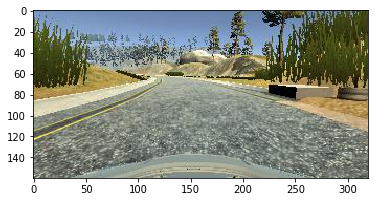

Dimensiones de la imagen original: (160, 320, 3)

Aplicando recorte a la imagen...

Imagen recortada:


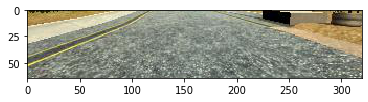

Dimensiones de la imagen recortada: (65, 320, 3)

Imagen recortada correctamente.



In [13]:
prueba3()